In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Linnerud dataset
linnerud = load_linnerud()
X = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
y = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

In [3]:
# Combine features and target for easier preprocessing
df = pd.concat([X, y], axis=1)

print(df.head())
print(df.info())

   Chins  Situps  Jumps  Weight  Waist  Pulse
0    5.0   162.0   60.0   191.0   36.0   50.0
1    2.0   110.0   60.0   189.0   37.0   52.0
2   12.0   101.0  101.0   193.0   38.0   58.0
3   12.0   105.0   37.0   162.0   35.0   62.0
4   13.0   155.0   58.0   189.0   35.0   46.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

# If there were missing values, we could impute them like this:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64


In [5]:
# Transformation to weight column
df['Weight_log'] = np.log(df['Weight'])

In [6]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
features_to_scale = ['Chins', 'Situps', 'Jumps', 'Weight_log']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [7]:
# Feature Engineering:
# Let's create a new feature as the ratio of Situps to Jumps:
df['Situps_to_Jumps_Ratio'] = df['Situps'] / df['Jumps']

In [10]:
print(df.head())

      Chins    Situps     Jumps  Weight  Waist  Pulse  Weight_log  \
0 -0.863671  0.269750 -0.206086   191.0   36.0   50.0    0.582642   
1 -1.445921 -0.582956 -0.206086   189.0   37.0   52.0    0.501681   
2  0.494912 -0.730539  0.614257   193.0   38.0   58.0    0.662758   
3  0.494912 -0.664946 -0.666279   162.0   35.0   62.0   -0.683916   
4  0.688996  0.154963 -0.246103   189.0   35.0   46.0    0.501681   

   Situps_to_Jumps_Ratio  
0              -1.308919  
1               2.828698  
2              -1.189306  
3               0.998001  
4              -0.629667  


In [9]:
print(df.describe())

              Chins        Situps         Jumps      Weight      Waist  \
count  2.000000e+01  2.000000e+01  2.000000e+01   20.000000  20.000000   
mean   1.776357e-16 -2.164935e-16  4.440892e-17  178.600000  35.400000   
std    1.025978e+00  1.025978e+00  1.025978e+00   24.690505   3.201973   
min   -1.640004e+00 -1.566847e+00 -9.063789e-01  138.000000  31.000000   
25%   -9.121915e-01 -7.305392e-01 -6.162576e-01  160.750000  33.000000   
50%    3.978708e-01 -3.779782e-01 -3.261364e-01  176.000000  35.000000   
75%    7.375166e-01  1.056863e+00  2.991251e-01  191.500000  37.000000   
max    1.465329e+00  1.729189e+00  3.595503e+00  247.000000  46.000000   

           Pulse    Weight_log  Situps_to_Jumps_Ratio  
count  20.000000  2.000000e+01              20.000000  
mean   56.100000 -5.118128e-15               2.325820  
std     7.210373  1.025978e+00               5.472601  
min    46.000000 -1.917137e+00              -1.472785  
25%    51.500000 -7.441964e-01               0.537116

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

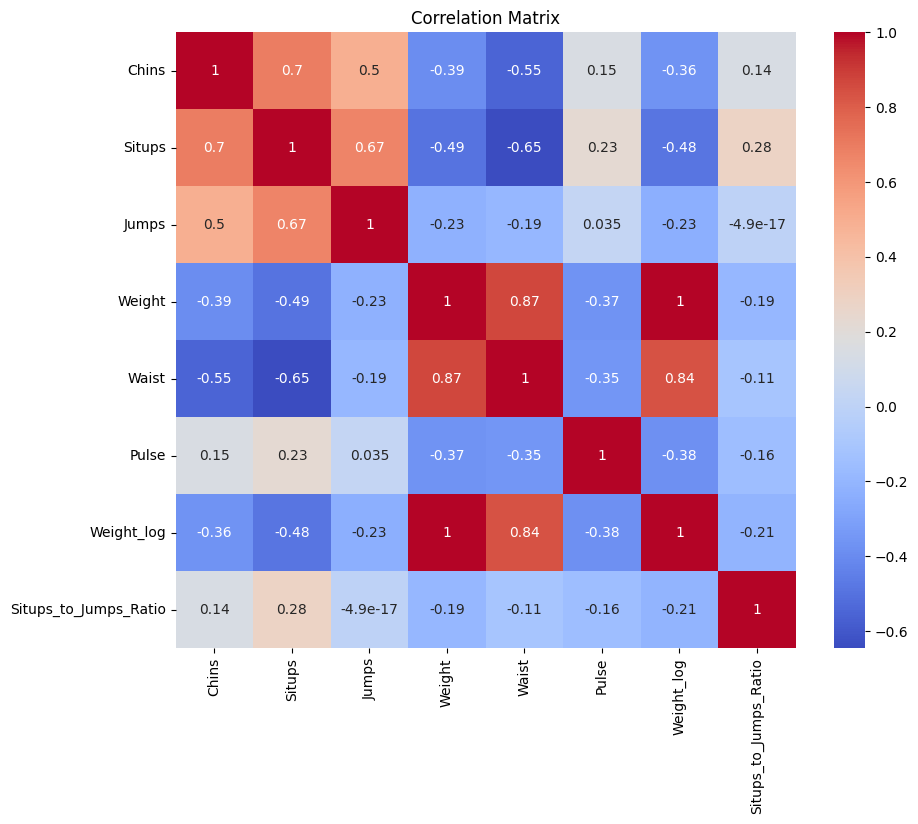

In [13]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Select top k features
X = df[['Chins', 'Situps', 'Jumps', 'Weight_log', 'Situps_to_Jumps_Ratio']]
y = df['Pulse']
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)

Selected features: ['Situps', 'Weight_log', 'Situps_to_Jumps_Ratio']
